In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
X_train = []
y_train = []

for i in range(60, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [6]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train.shape

(1198, 60)

In [9]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [10]:
X_train.shape

(1198, 60, 1)

In [11]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

Using TensorFlow backend.


In [12]:
nnRegressor = Sequential()

nnRegressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
nnRegressor.add(Dropout(rate = .2))

nnRegressor.add(LSTM(units = 50, return_sequences = True))
nnRegressor.add(Dropout(rate = .2))

nnRegressor.add(LSTM(units = 50, return_sequences = True))
nnRegressor.add(Dropout(rate = .2))

nnRegressor.add(LSTM(units = 50, return_sequences = False))
nnRegressor.add(Dropout(rate = .2))

nnRegressor.add(Dense(units = 1))

nnRegressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

nnRegressor.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0399
Epoch 2/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0059
Epoch 3/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0054
Epoch 4/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0048
Epoch 7/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0051
Epoch 8/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0049
Epoch 9/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0047
Epoch 11/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0041
Epoch 12/100
1198/1198 [==============================] - 8s 7ms/step - lo

1198/1198 [==============================] - 10s 8ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0016
Epoch 100/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0016


In [14]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [15]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [16]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [17]:
inputs.shape

(80,)

In [18]:
inputs = inputs.reshape(-1,1)

In [19]:
inputs.shape

(80, 1)

In [20]:
inputs = sc.transform(inputs)

In [38]:
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

In [39]:
X_test = np.array(X_test)

In [40]:
X_test.shape

(20, 60)

In [41]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [42]:
X_test.shape

(20, 60, 1)

In [43]:
predicted_stock_price = nnRegressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

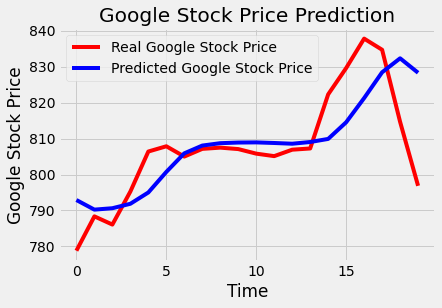

In [44]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()